<a href="https://colab.research.google.com/github/vivek3695/summer-internship/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from typing_extensions import dataclass_transform
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/drive/My Drive/bf3_data_2022_01_07.xlsx'
data = pd.read_excel(file_path)


from sklearn.multioutput import MultiOutputRegressor




# Display first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle missing values by imputing the mean for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Confirm there are no missing values

# Confirm there are no missing values
print(data.isnull().sum())

# Create a new column for CO/CO2 ratio
data['CO_CO2_Ratio'] = data['CO'] / data['CO2']

# Create future targets for CO/CO2 ratio for every 10 minutes up to 1 hour (6 intervals)
for i in range(1, 7):
    data[f'CO_CO2_Ratio_{i*10}min'] = data['CO_CO2_Ratio'].shift(-i)

# Drop rows with NaN values after shifting
data = data.dropna()

# Extract features and target variables
X = data.drop(columns=['CO2', 'CO', 'DATE_TIME', 'CO_CO2_Ratio'] + [f'CO_CO2_Ratio_{i*10}min' for i in range(1, 7)])
y = data[[f'CO_CO2_Ratio_{i*10}min' for i in range(1, 7)]]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predict the target variables
y_pred = model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
print(f'RandomForestRegressor - MSE: {mse}, R2: {r2}')

# Plotting the actual vs predicted values for each 10-minute interval up to 1 hour
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for i in range(6):
    ax = axes[i]
    interval = (i + 1) * 10
    ax.scatter(y_test[f'CO_CO2_Ratio_{interval}min'], y_pred[:, i], alpha=0.7)
    ax.set_xlabel(f'Actual CO/CO2 Ratio {interval}min')
    ax.set_ylabel(f'Predicted CO/CO2 Ratio {interval}min')
    ax.set_title(f'Actual vs Predicted CO/CO2 Ratio {interval}min')
    ax.plot([min(y_test[f'CO_CO2_Ratio_{interval}min']), max(y_test[f'CO_CO2_Ratio_{interval}min'])],
            [min(y_test[f'CO_CO2_Ratio_{interval}min']), max(y_test[f'CO_CO2_Ratio_{interval}min'])], color='red', lw=2)
plt.tight_layout()
plt.show()


Mounted at /content/drive
        DATE_TIME   CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  STEAM_TEMP  \
0  01-07-21 00:10  311727.0      3.15    129.0         4.0       213.0   
1  01-07-21 00:20  315163.0      3.16    129.0         4.0       209.0   
2  01-07-21 00:30  314595.0      3.16    128.0         4.0       205.0   
3  01-07-21 00:40  312465.0      3.16    127.0         4.0       200.0   
4  01-07-21 00:50  302981.0      3.11    126.0         4.0       194.0   

   STEAM_PRESS  O2_PRESS  O2_FLOW  O2_PER  ...  TOP_TEMP2  TOP_TEMP3  \
0         3.34      3.20   7296.0   23.08  ...      135.0      107.0   
1         3.35      3.20   7829.0   23.08  ...      143.0      109.0   
2         3.35      3.21   7904.0   23.08  ...      138.0      110.0   
3         3.35      3.21   7919.0   23.08  ...      128.0      102.0   
4         3.29      3.16   7938.0   23.08  ...      139.0      112.0   

   TOP_TEMP4  TOP_SPRAY  TOP_TEMP  TOP_PRESS_1     CO    CO2    H2  \
0      130.0        0.0   

KeyboardInterrupt: 

DATE_TIME             0
CB_FLOW               0
CB_PRESS              0
CB_TEMP               0
STEAM_FLOW            0
STEAM_TEMP            0
STEAM_PRESS           0
O2_PRESS              0
O2_FLOW               0
O2_PER                0
PCI                   0
ATM_HUMID             0
HB_TEMP               0
HB_PRESS              0
TOP_PRESS             0
TOP_TEMP1             0
TOP_TEMP2             0
TOP_TEMP3             0
TOP_TEMP4             0
TOP_SPRAY             0
TOP_TEMP              0
TOP_PRESS_1           0
CO                    0
CO2                   0
H2                    0
SKIN_TEMP_AVG         0
CO_CO2_Ratio          0
CO_CO2_Ratio_10min    0
CO_CO2_Ratio_20min    0
CO_CO2_Ratio_30min    0
CO_CO2_Ratio_40min    0
CO_CO2_Ratio_50min    0
CO_CO2_Ratio_60min    0
dtype: int64
RandomForestRegressor - MSE: [0.00148717 0.00117354 0.00131403 0.00130734 0.00150817 0.00133359], R2: [0.92282561 0.93882449 0.93307138 0.93767566 0.93550252 0.94237833]


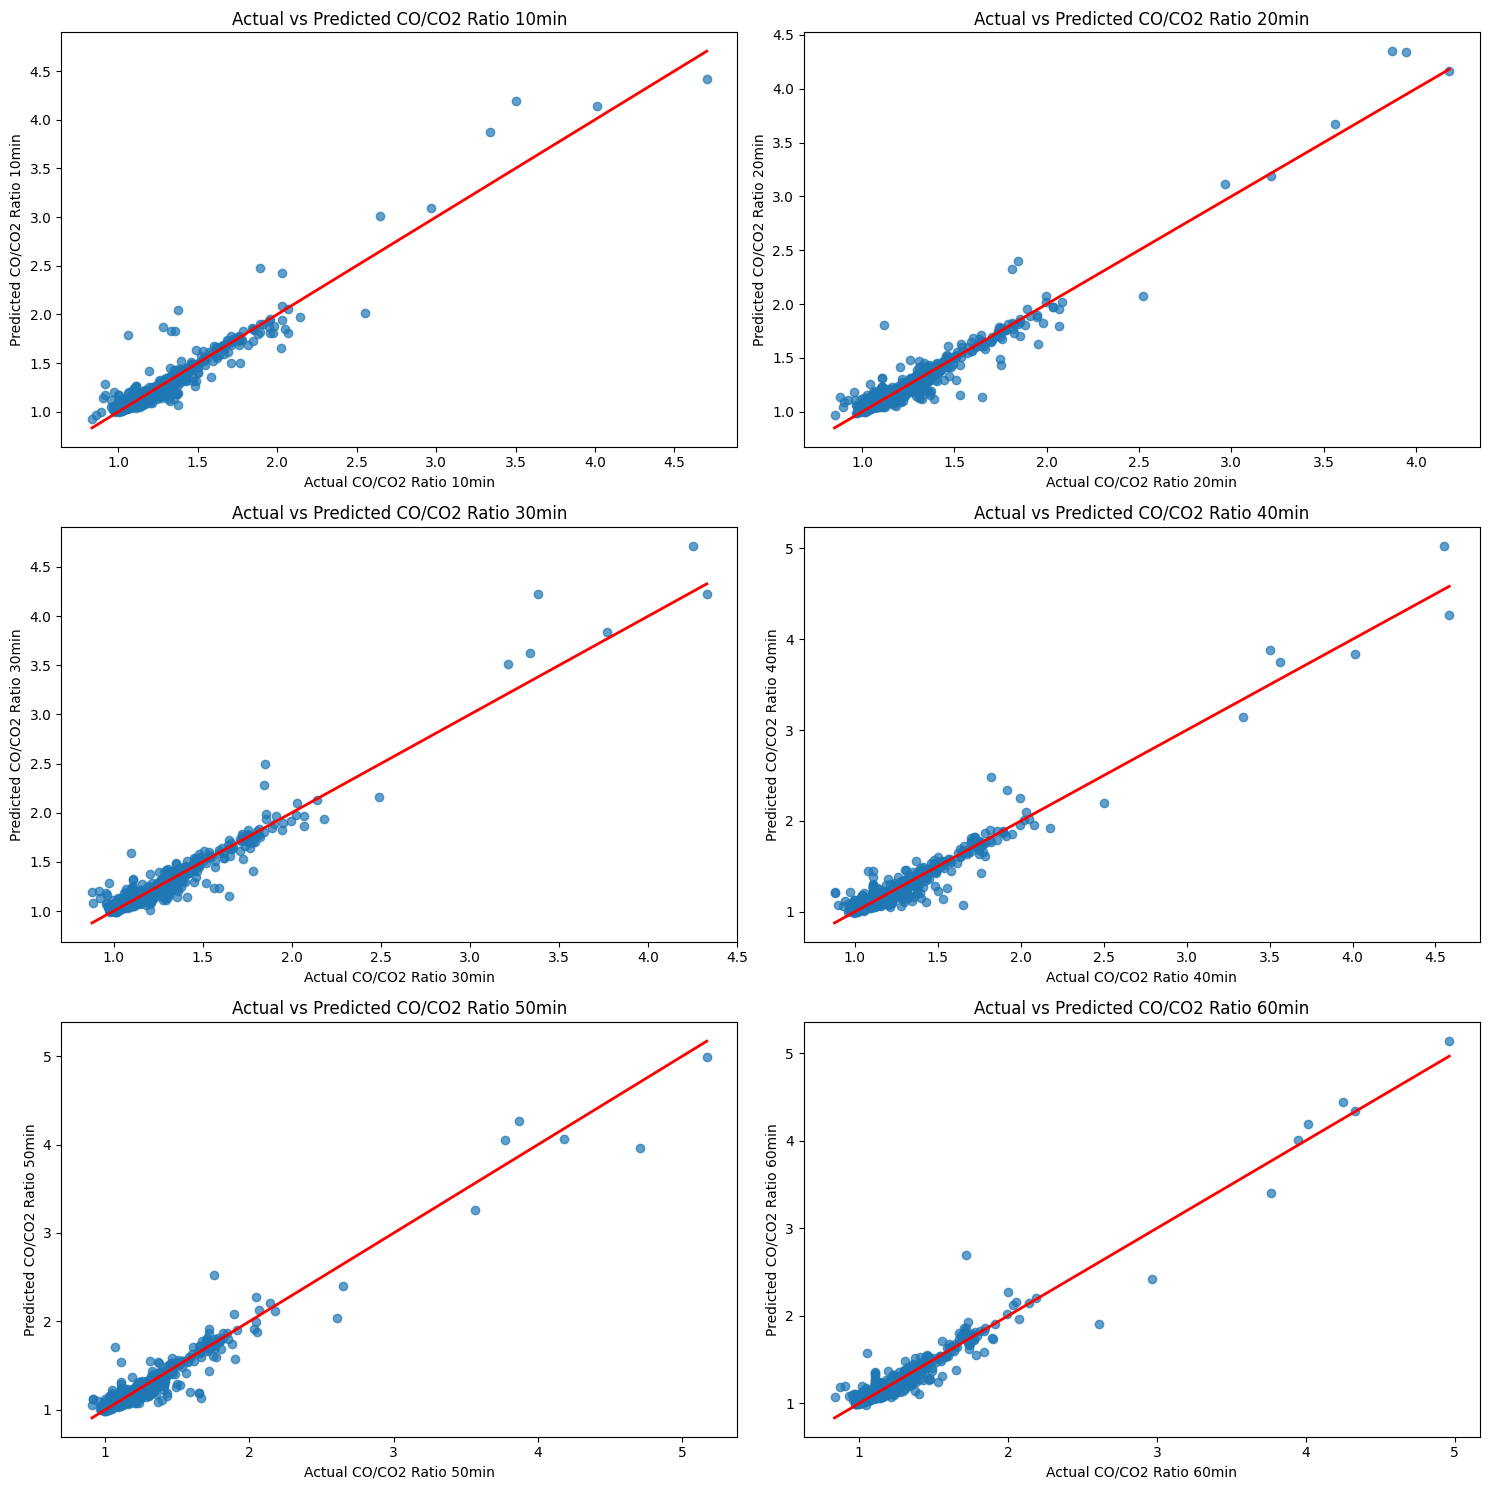

"new_data = X_test.iloc[-1].values.reshape(1, -1)\nhourly_predictions = model.predict(new_data)\n\nfor i in range(6):\n    print(f'Predicted CO/CO2 Ratio for {i*10 + 10} minutes from now: {hourly_predictions[0, i]}')\n"

In [3]:
from sklearn.multioutput import MultiOutputRegressor



# Handle missing values by imputing the mean for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Confirm there are no missing values
print(data.isnull().sum())

# Create a new column for CO/CO2 ratio
data['CO_CO2_Ratio'] = data['CO'] / data['CO2']

# Create future targets for CO/CO2 ratio for every 10 minutes up to 1 hour (6 intervals)
'''///for i in range(1, 7):
    data[f'CO_CO2_Ratio_{i*10}min'] = data['CO_CO2_Ratio'].shift(-i)'''

# Drop rows with NaN values after shifting
data = data.dropna()

# Extract features and target variables
X = data.drop(columns=['CO2', 'CO', 'DATE_TIME', 'CO_CO2_Ratio'] + [f'CO_CO2_Ratio_{i*10}min' for i in range(1, 7)])
y = data[[f'CO_CO2_Ratio_{i*10}min' for i in range(1, 7)]]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=50, random_state=42))
model.fit(X_train, y_train)

# Predict the target variables
y_pred = model.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
print(f'RandomForestRegressor - MSE: {mse}, R2: {r2}')

# Print the first few rows of actual vs predicted values for each 10-minute interval up to 1 hour
'''for i in range(6):
    interval = (i + 1) * 10
    actual_vs_predicted = pd.DataFrame({
        f'Actual CO/CO2 Ratio {interval}min': y_test[f'CO_CO2_Ratio_{interval}min'],
        f'Predicted CO/CO2 Ratio {interval}min': y_pred[:, i]
    })
    print(f'Actual vs Predicted CO/CO2 Ratio {interval}min:\n', actual_vs_predicted.head(), '\n')'''

# Plotting the actual vs predicted values for each 10-minute interval up to 1 hour
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for i in range(6):
    ax = axes[i]
    interval = (i + 1) * 10
    ax.scatter(y_test[f'CO_CO2_Ratio_{interval}min'], y_pred[:, i], alpha=0.7)
    ax.set_xlabel(f'Actual CO/CO2 Ratio {interval}min')
    ax.set_ylabel(f'Predicted CO/CO2 Ratio {interval}min')
    ax.set_title(f'Actual vs Predicted CO/CO2 Ratio {interval}min')
    ax.plot([min(y_test[f'CO_CO2_Ratio_{interval}min']), max(y_test[f'CO_CO2_Ratio_{interval}min'])],
            [min(y_test[f'CO_CO2_Ratio_{interval}min']), max(y_test[f'CO_CO2_Ratio_{interval}min'])], color='red', lw=2)
plt.tight_layout()
plt.show()

# Making predictions for the next 1 hour (6 intervals, every 10 minutes)
'''new_data = X_test.iloc[-1].values.reshape(1, -1)
hourly_predictions = model.predict(new_data)

for i in range(6):
    print(f'Predicted CO/CO2 Ratio for {i*10 + 10} minutes from now: {hourly_predictions[0, i]}')
'''

In [4]:
num_hours = 4  # Change this value to the desired number of hours
num_intervals = num_hours * 6

new_data = X_test.iloc[-1].values.reshape(1, -1)
hourly_predictions = []

for i in range(num_intervals):
    prediction = model.predict(new_data)
    hourly_predictions.append(prediction[0])
    # Update new_data with the latest prediction
    new_data = np.append(new_data[:, :-6], prediction).reshape(1, -1)

# Print predictions for the specified number of hours
for i in range(num_intervals):
    interval = (i + 1) * 10
    print(f'Predicted CO/CO2 Ratio for {interval} minutes from now: {hourly_predictions[i][i % 6]}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Predicted CO/CO2 Ratio for 10 minutes from now: 1.0591334723646606
Predicted CO/CO2 Ratio for 20 minutes from now: 1.1541117084462191
Predicted CO/CO2 Ratio for 30 minutes from now: 1.1500814570835736
Predicted CO/CO2 Ratio for 40 minutes from now: 1.1470526491836666
Predicted CO/CO2 Ratio for 50 minutes from now: 1.145607756050028
Predicted CO/CO2 Ratio for 60 minutes from now: 1.1490990992850876
Predicted CO/CO2 Ratio for 70 minutes from now: 1.1851176000668897
Predicted CO/CO2 Ratio for 80 minutes from now: 1.1541117084462191
Predicted CO/CO2 Ratio for 90 minutes from now: 1.1500814570835736
Predicted CO/CO2 Ratio for 100 minutes from now: 1.1470526491836666
Predicted CO/CO2 Ratio for 110 minutes from now: 1.145607756050028
Predicted CO/CO2 Ratio for 120 minutes from now: 1.1490990992850876
Predicted CO/CO2 Ratio for 130 minutes from now: 1.1851176000668897
Predicted CO/CO2 Ratio for 140 minutes from now: 1.1541117084462191
Predicted CO/CO2 Ratio for 150 minutes from now: 1.15008145

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does